In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import chi2_contingency

In [45]:
path = '../data/processed_data/processed_df.csv'
df = pd.read_csv(path)

df


,occurrence_id,classification,latitude,longitude,city,state,country,date,time,aircraft_type,aircraft_manufacturer,aircraft_model,aircraft_damage_level,total_aircraft_fatalities,type_category
0,82047,INCIDENTE,-20.46944444444,-54.67027777777,CAMPO GRANDE,MS,BRASIL,19/04/2023,13:25:00,AVIÃO,BOEING COMPANY,737-8EH,NENHUM,0,COLISÃO COM AVE
1,82045,INCIDENTE,-25.53166666666,-49.17611111111,SÃO JOSÉ DOS PINHAIS,PR,BRASIL,09/04/2023,20:50:00,AVIÃO,BOEING COMPANY,737-8EH,NENHUM,0,COLISÃO COM AVE
2,82039,INCIDENTE,-22.81,-43.25055555555,RIO DE JANEIRO,RJ,BRASIL,17/04/2023,13:20:00,AVIÃO,UNIVAIR AIRCRAFT,108-1,NENHUM,0,COLISÃO COM AVE
3,82038,INCIDENTE,-23.43555555555,-46.47305555555,GUARULHOS,SP,BRASIL,18/04/2023,09:55:00,AVIÃO,BOEING COMPANY,737-8EH,NENHUM,0,COLISÃO COM AVE
4,82037,INCIDENTE,-12.90861111111,-38.3225,SALVADOR,BA,BRASIL,18/04/2023,11:25:00,AVIÃO,BOEING COMPANY,737-8EH,NENHUM,0,COLISÃO COM AVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6134,45390,ACIDENTE,-18.4319444444,-49.4430555556,CACHOEIRA DOURADA,GO,BRASIL,20/01/2012,21:00:00,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,SUBSTANCIAL,0,OPERAÇÃO A BAIXA ALTITUDE
6135,45334,INCIDENTE,-1.384722222222,-48.47888888888,BELÉM,PA,BRASIL,08/01/2012,19:12:00,AVIÃO,AIRBUS INDUSTRIE,A320-214,LEVE,0,ESTOURO DE PNEU
6136,45333,ACIDENTE,-30.249167,-50.765,VIAMÃO,RS,BRASIL,06/01/2012,13:00:00,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201,SUBSTANCIAL,0,FALHA DO MOTOR EM VOO
6137,45332,ACIDENTE,-30.249167,-50.765,VIAMÃO,RS,BRASIL,09/01/2012,13:30:00,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,SUBSTANCIAL,0,PERDA DE CONTROLE NO SOLO


# Where do aviation incidents most frequently occur per state?

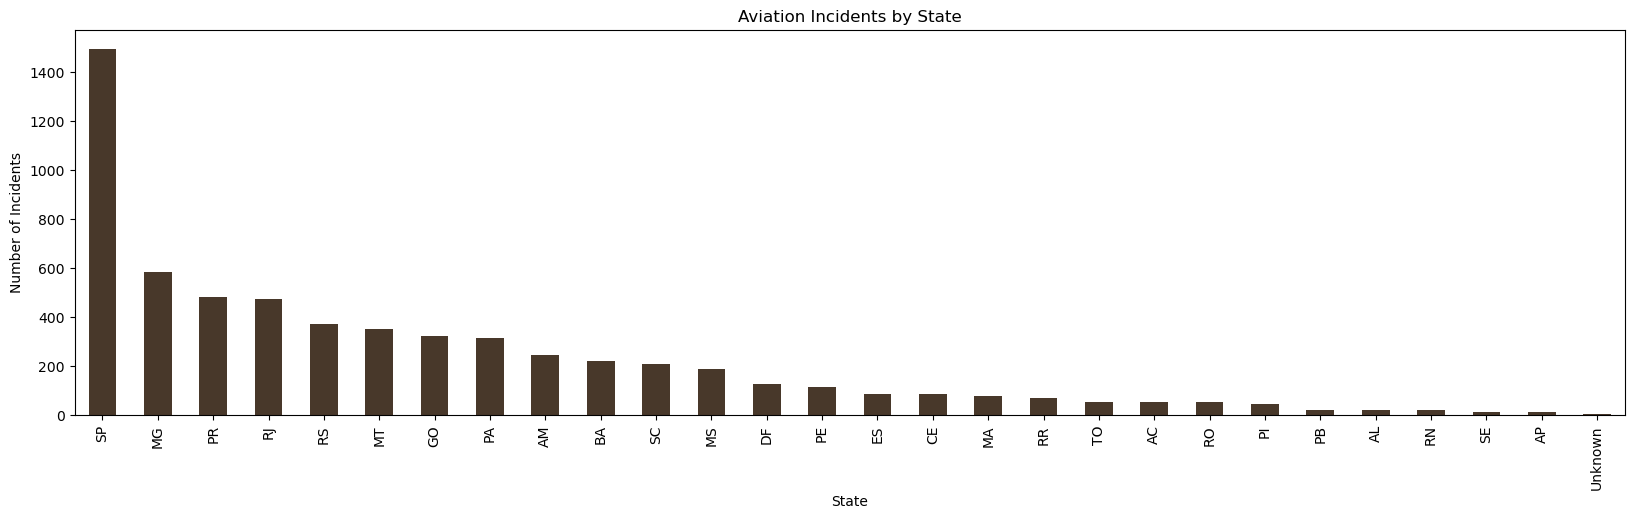

In [46]:
state_incident_counts = df['state'].value_counts().sort_values(ascending= False)


plt.figure(figsize=(20, 5))
state_incident_counts.plot(kind='bar', color='#48382A')
plt.title('Aviation Incidents by State')
plt.xlabel('State')
plt.ylabel('Number of Incidents')
plt.show()

# How has the number of aviation incidents changed over the years?

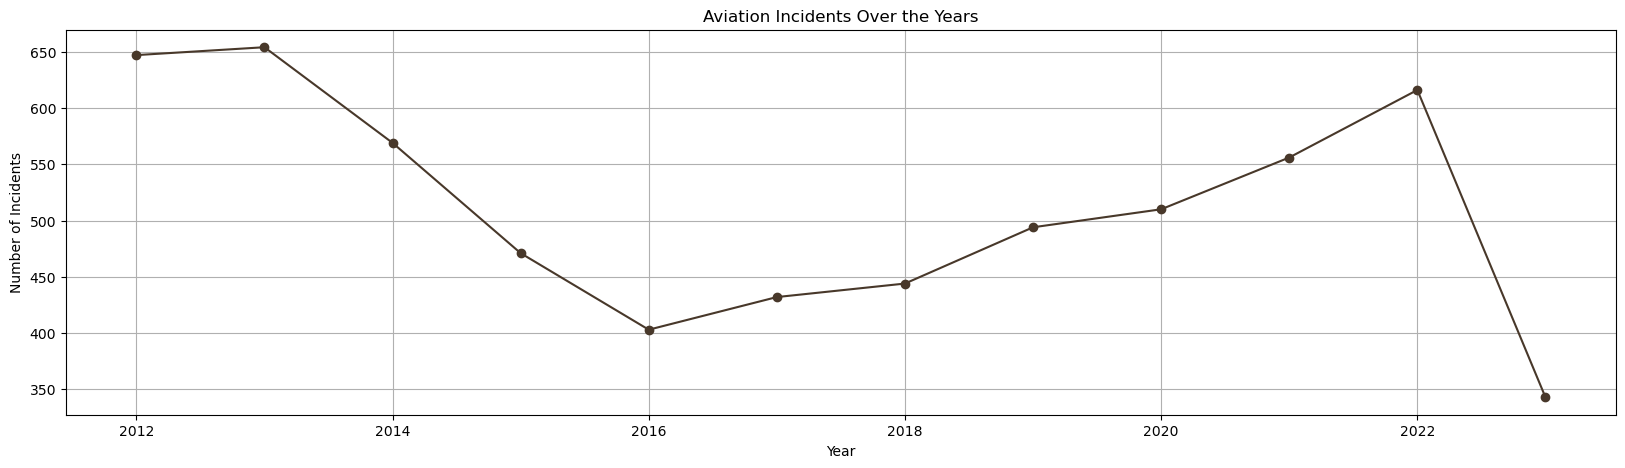

In [47]:

df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')


df['year'] = df['date'].dt.year


incident_counts_by_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(20, 5))
incident_counts_by_year.plot(kind='line', marker='o', linestyle='-', color='#48382A')
plt.title('Aviation Incidents Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

# Is there a relationship between aircraft type and the severity of incidents?

In [48]:
grouped_data = df.groupby(['aircraft_type', 'aircraft_damage_level']).size().unstack(fill_value=0)

grouped_data



aircraft_damage_level,DESTRUÍDA,LEVE,NENHUM,SUBSTANCIAL,Unknown
aircraft_type,,,,,
ANFÍBIO,1,7,1,5,0
AVIÃO,210,1494,1926,1304,30
BALÃO,0,0,0,1,0
DIRIGÍVEL,0,1,0,0,0
HELICÓPTERO,43,189,220,174,6
HIDROAVIÃO,0,1,0,0,0
PLANADOR,1,3,1,9,0
TRIKE,0,0,0,5,0
ULTRALEVE,54,69,41,169,9


# Which manufacturers are involved in the most incidents?

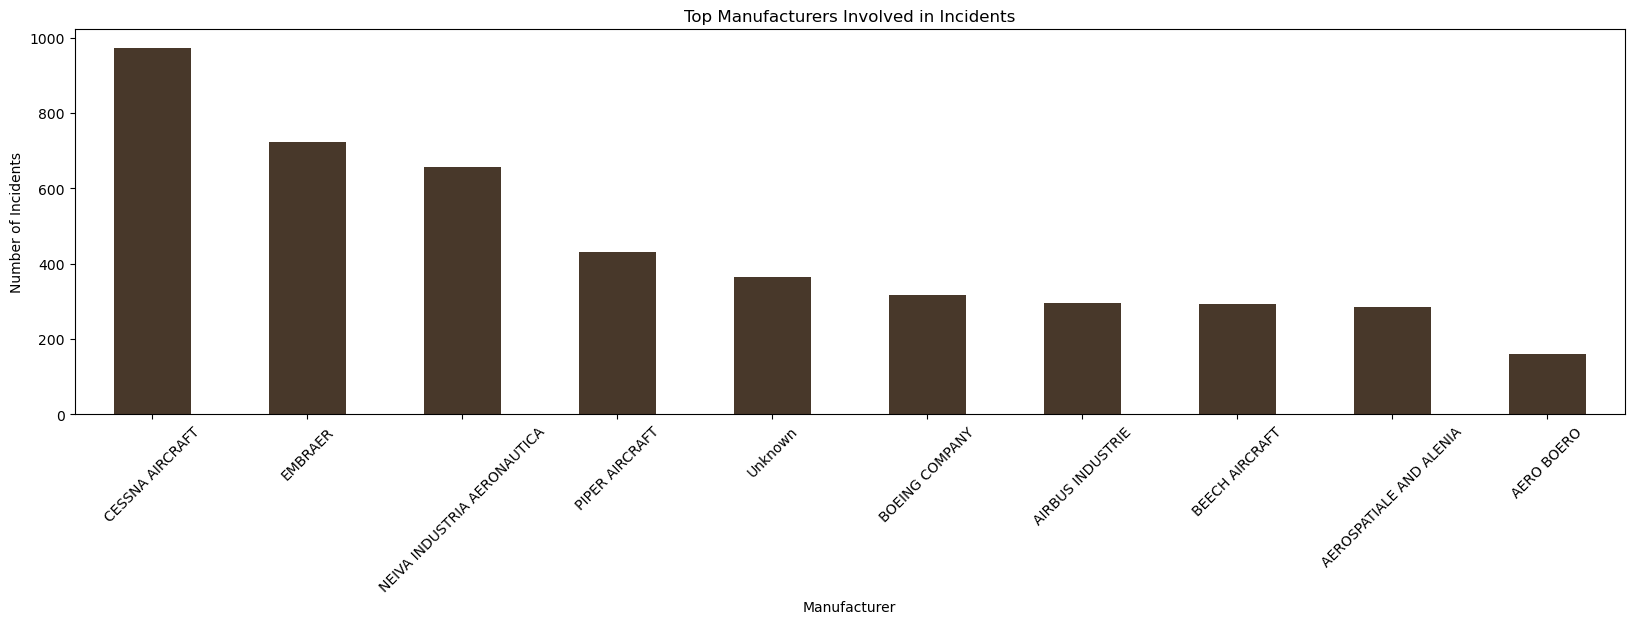

In [49]:
manufacturer_counts = (df['aircraft_manufacturer'].value_counts()).sort_values(ascending= False)

# Select the top N manufacturers with the most incidents (adjust N as needed)
top_manufacturers = manufacturer_counts.head(10)

# Create a bar chart
plt.figure(figsize=(20, 5))
top_manufacturers.plot(kind='bar', color='#48382A')
plt.title('Top Manufacturers Involved in Incidents')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

# What is the most common classification of incidents?

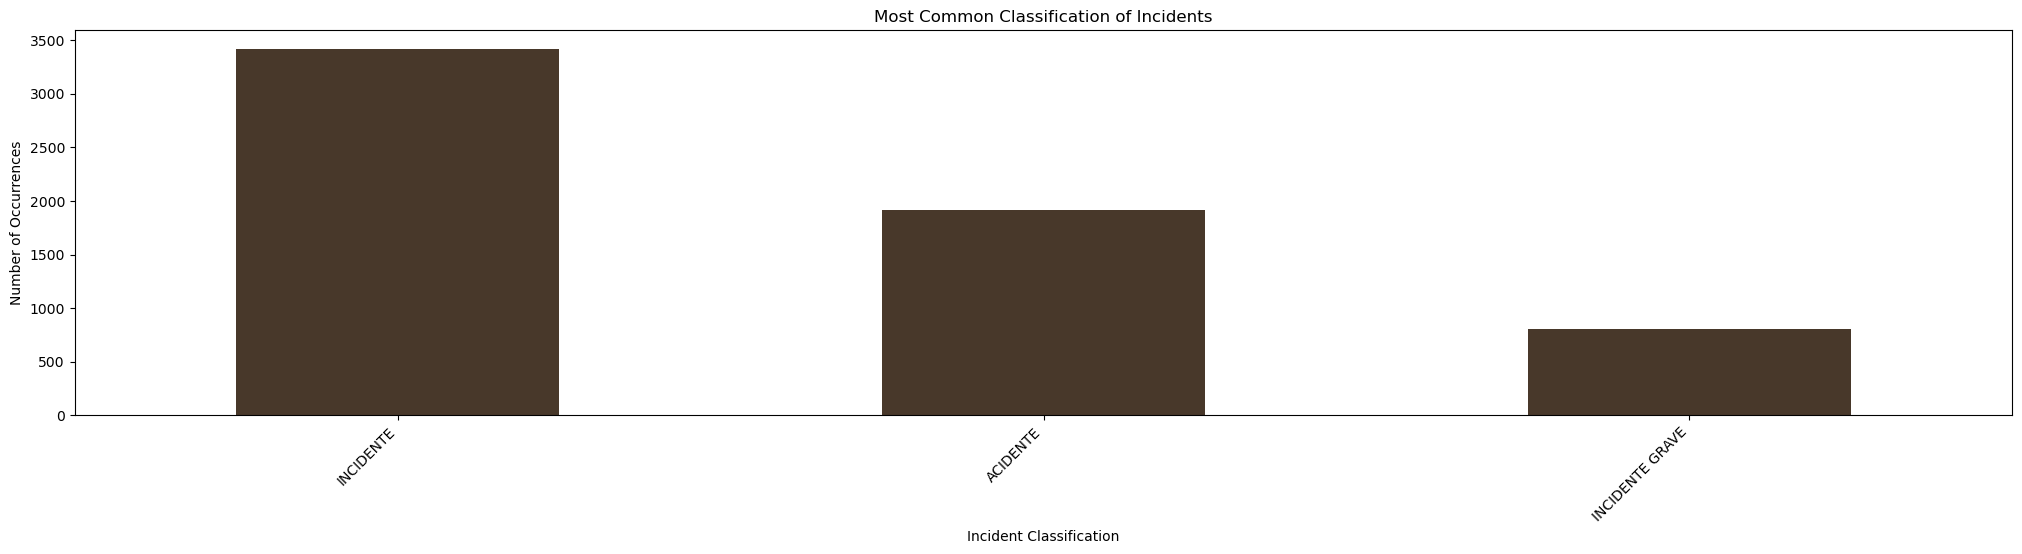

In [60]:
incident_classification_counts = df['classification'].value_counts()

# Create a bar chart
plt.figure(figsize=(25, 5))
incident_classification_counts.plot(kind='bar', color='#48382A')
plt.title('Most Common Classification of Incidents')
plt.xlabel('Incident Classification')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Is there a correlation between the location and the severity of incidents?

In [51]:
contingency_table = pd.crosstab(df['state'], df['classification'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

print("Chi-squared value:", chi2)
print("p-value:", p)

Chi-squared value: 570.7579075028641
p-value: 2.1785492966260696e-87


### The chi-squared test for independence revealed a statistically significant association between the location (state or country) and the severity of aviation incidents. This suggests that the geographic location may play a role in influencing the level of incident severity. Further analysis can be conducted to explore this relationship and its potential implications for safety measures.

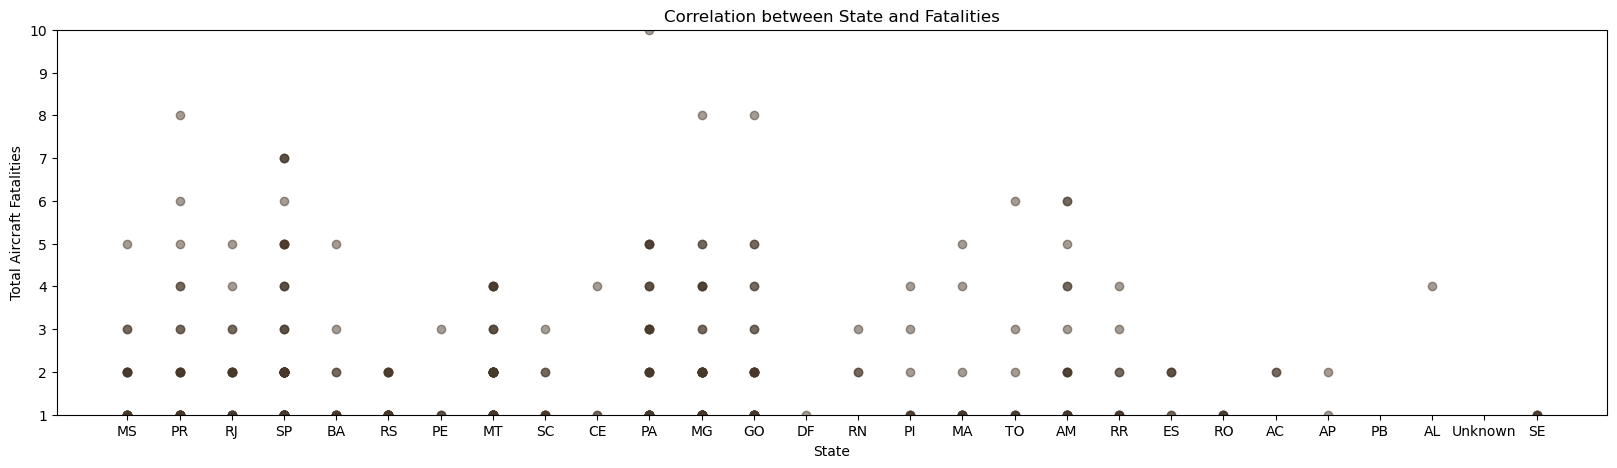

In [52]:
plt.figure(figsize=(20, 5))
plt.scatter(df['state'], df['total_aircraft_fatalities'], alpha=0.5, color='#48382A')
plt.xlabel('State')
plt.ylabel('Total Aircraft Fatalities')
plt.title('Correlation between State and Fatalities')

# Set the minimum value of the y-axis to 1
plt.ylim(1, max(df['total_aircraft_fatalities']))

plt.show()

# Are there specific time periods or months with a higher frequency of incidents?

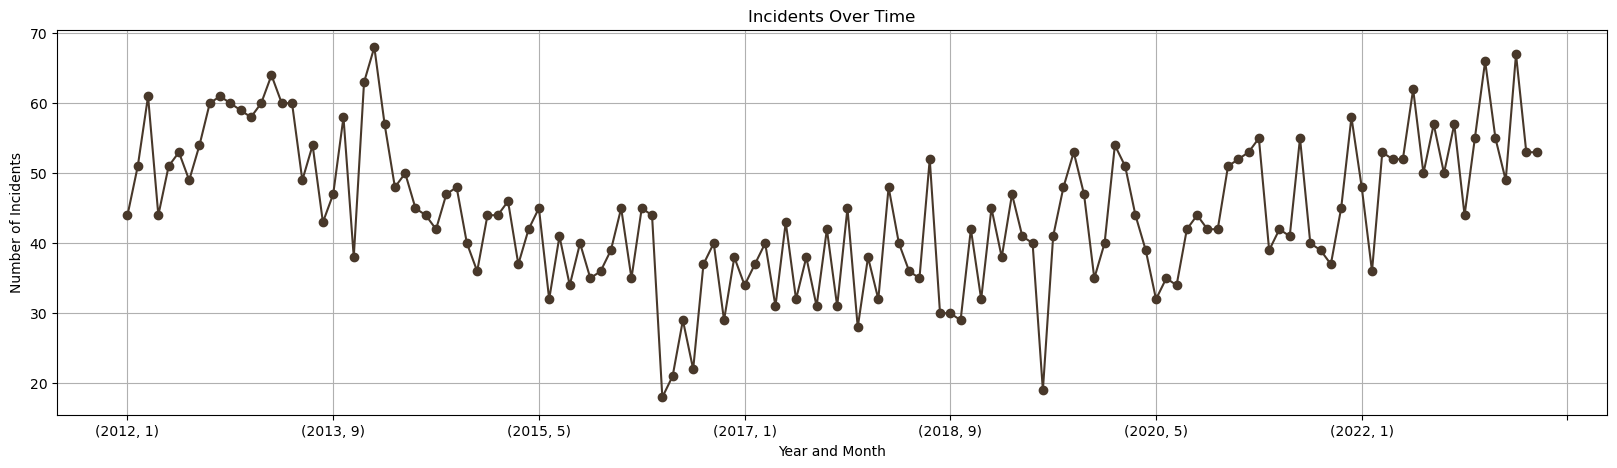

In [53]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')


df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

incident_counts_by_month = df.groupby(['year', 'month']).size()

plt.figure(figsize=(20, 5))
incident_counts_by_month.plot(kind='line', marker='o', linestyle='-', color='#48382A')
plt.title('Incidents Over Time')
plt.xlabel('Year and Month')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

In [65]:
df['aircraft_model'].value_counts().sort_values(ascending= False).head(10)

aircraft_model
ATR-72-212A        250
ERJ 190-200 IGW    215
EMB-810D           161
Unknown            160
152                157
AB-115             138
737-8EH            129
EMB-810C           124
EMB-202            106
EMB-202A           106
Name: count, dtype: int64

# Top 10 Most Frequent Aircraft Models

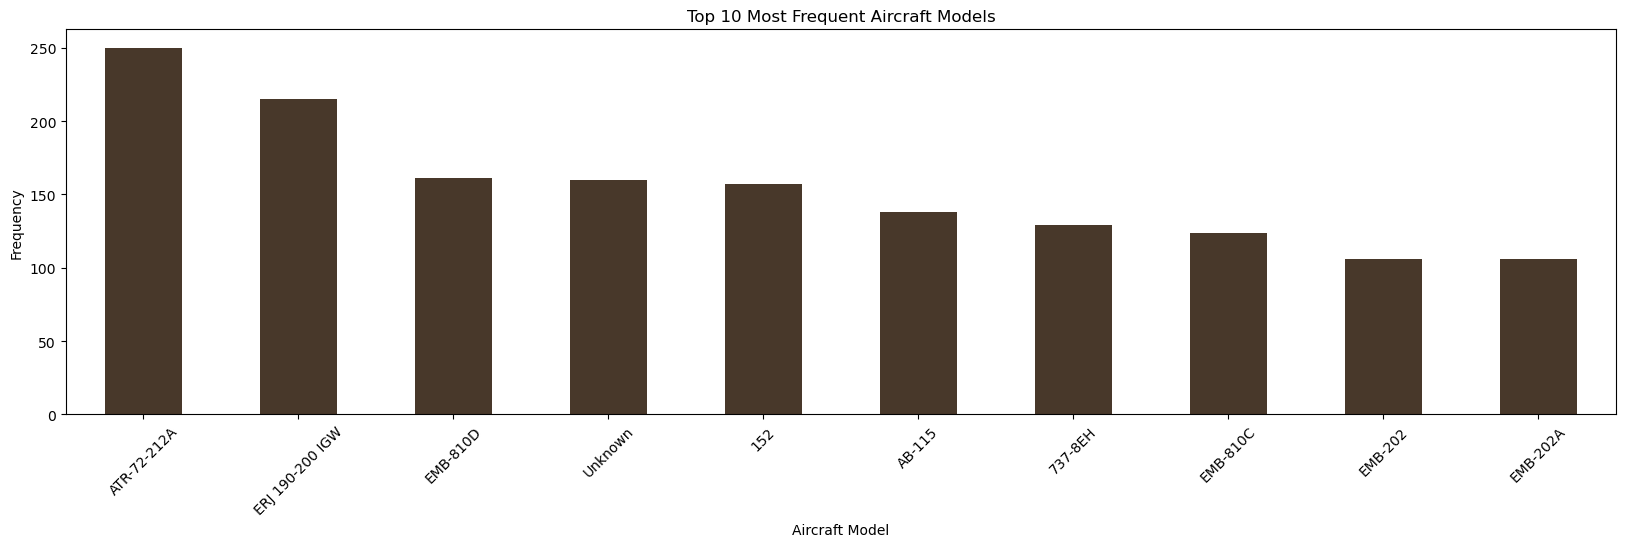

In [68]:
top_aircraft_models = df['aircraft_model'].value_counts().sort_values(ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(20, 5))
top_aircraft_models.plot(kind='bar', color='#48382A')
plt.title('Top 10 Most Frequent Aircraft Models')
plt.xlabel('Aircraft Model')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Distribution of Aircraft Damage Levels

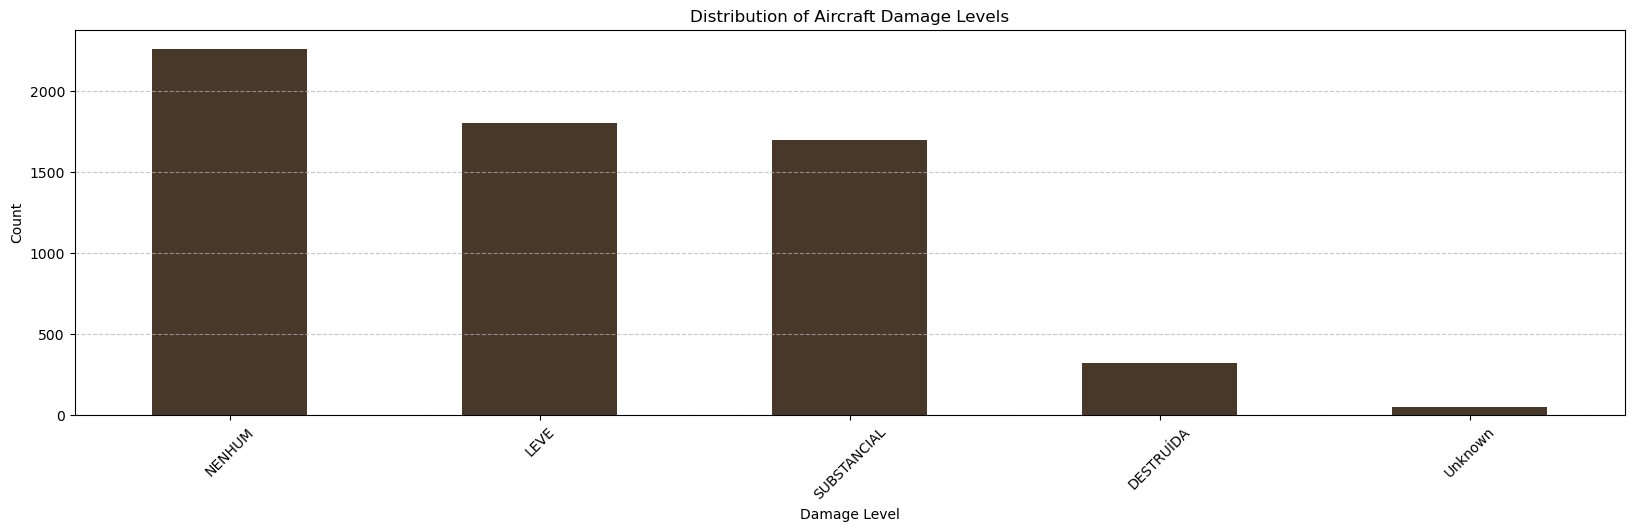

In [69]:
damage_level_counts = df['aircraft_damage_level'].value_counts()

# Create a bar chart to visualize the distribution
plt.figure(figsize=(20, 5))
damage_level_counts.plot(kind='bar', color='#48382A')
plt.title('Distribution of Aircraft Damage Levels')
plt.xlabel('Damage Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

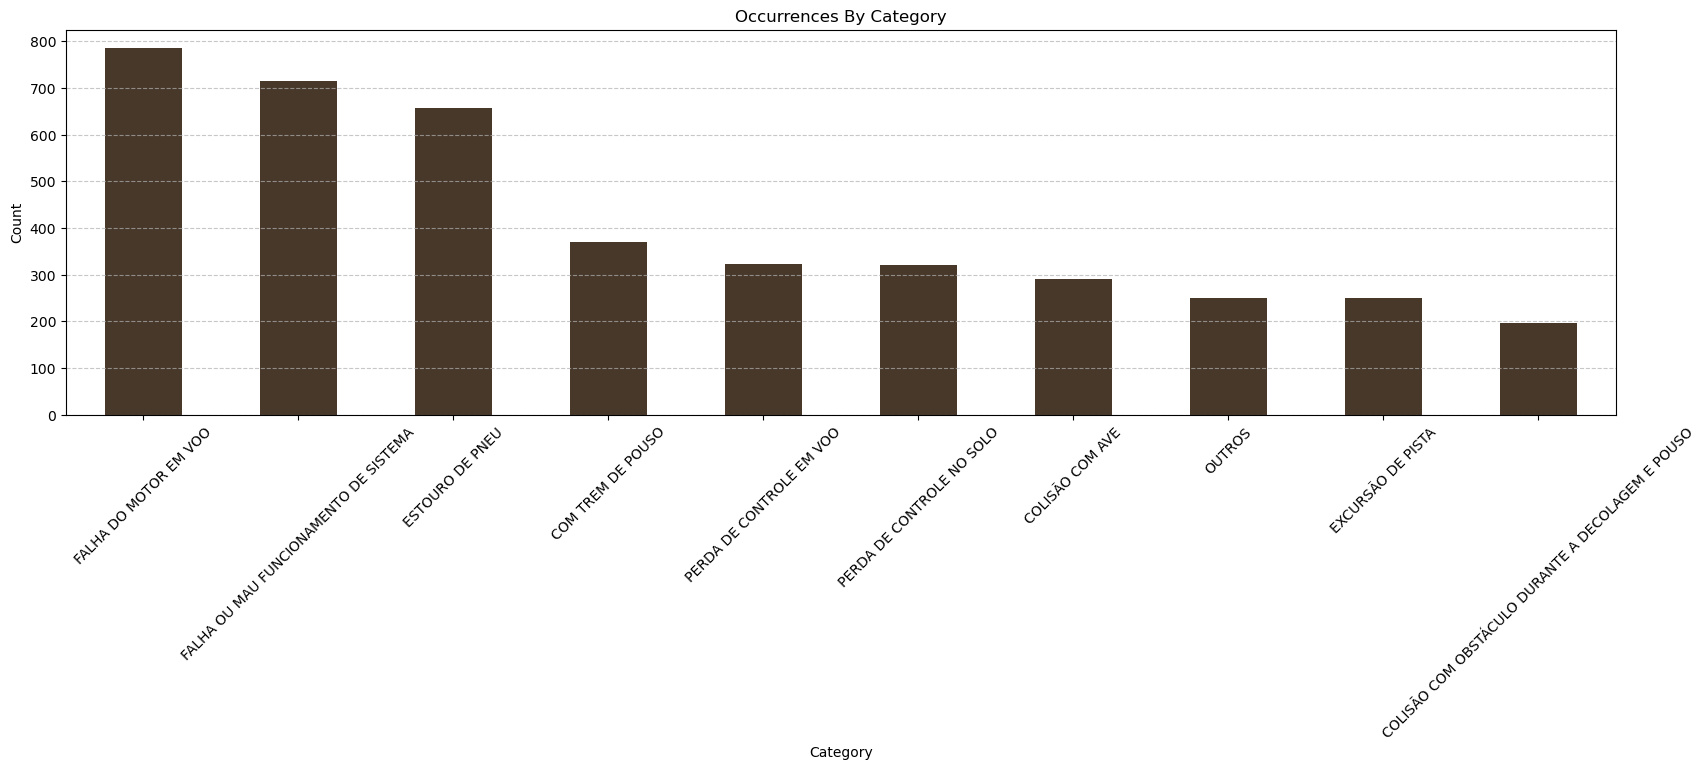

In [73]:
occurrence_category = df.type_category.value_counts().head(10)

plt.figure(figsize=(20, 5))
occurrence_category.plot(kind='bar', color='#48382A')
plt.title('Occurrences By Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()